# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Load the dataset

In [3]:
df=pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Check the shape of the dataset

In [4]:

df.shape

(506, 13)

### Get the info regarding column datatypes

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

### Get summary statistics for the numerical columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

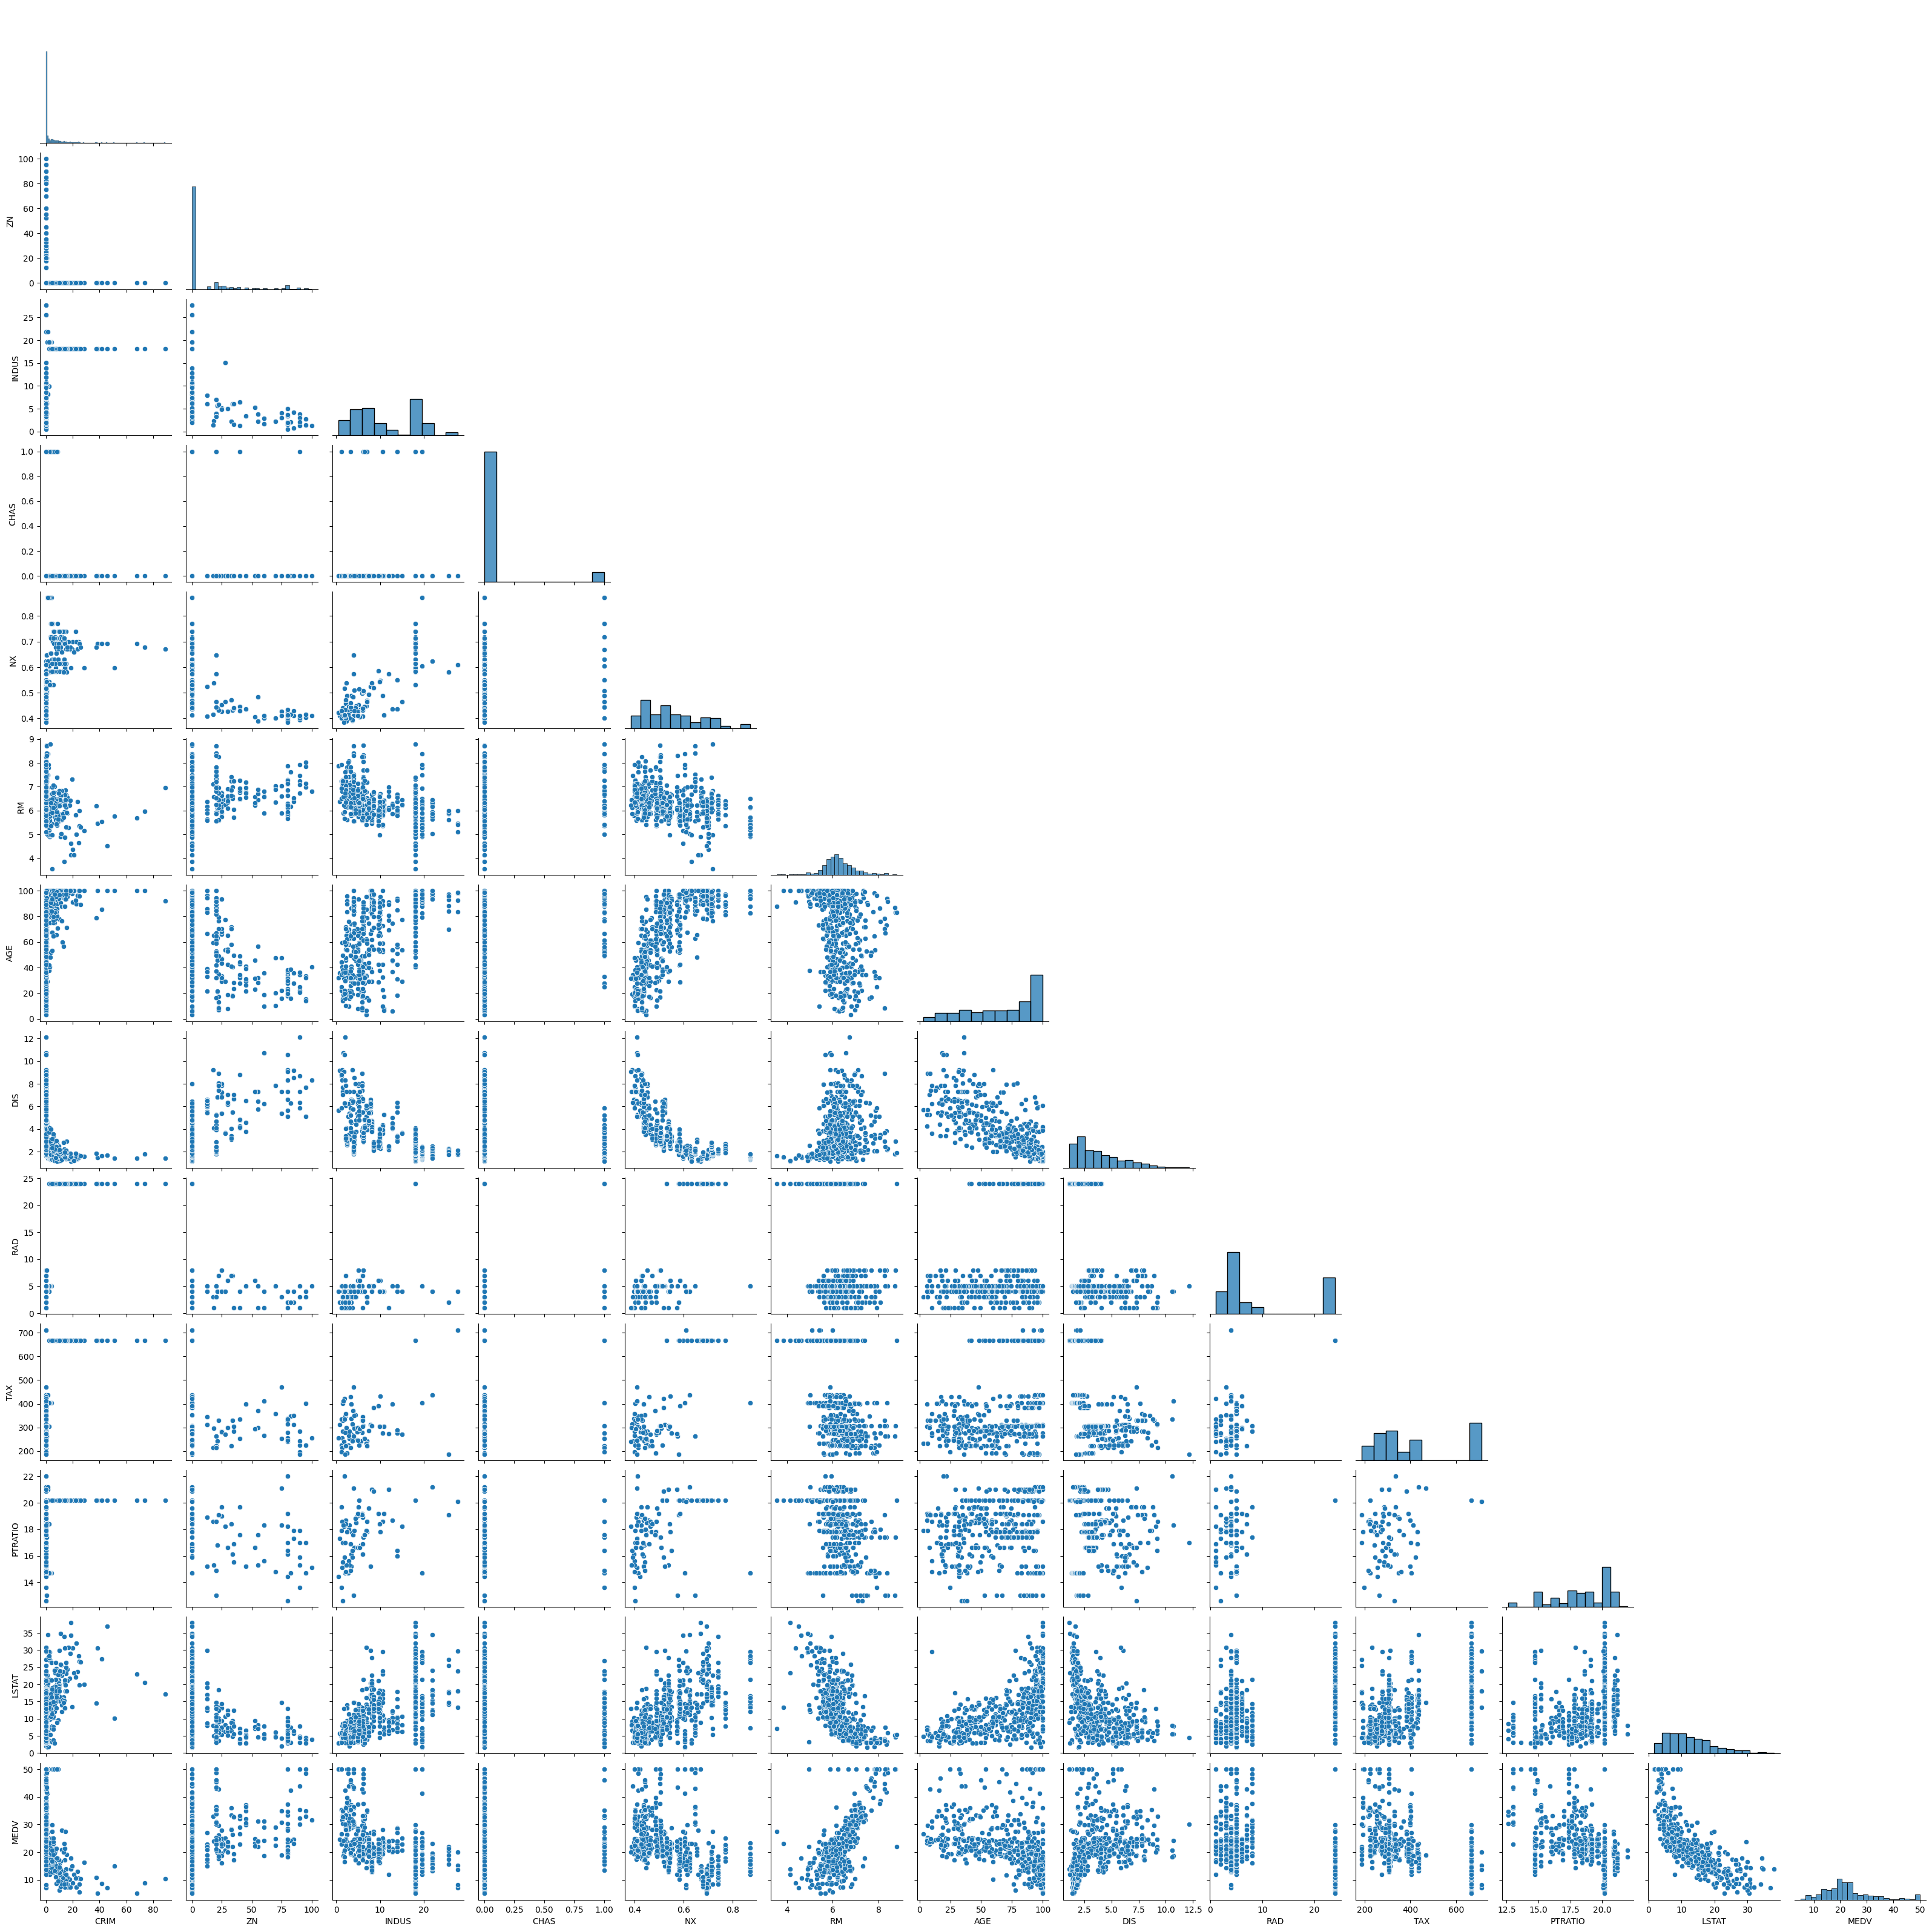

In [8]:
sns.pairplot(df,corner=True); 

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

**Plot the correlation heatmap and list your observations.**

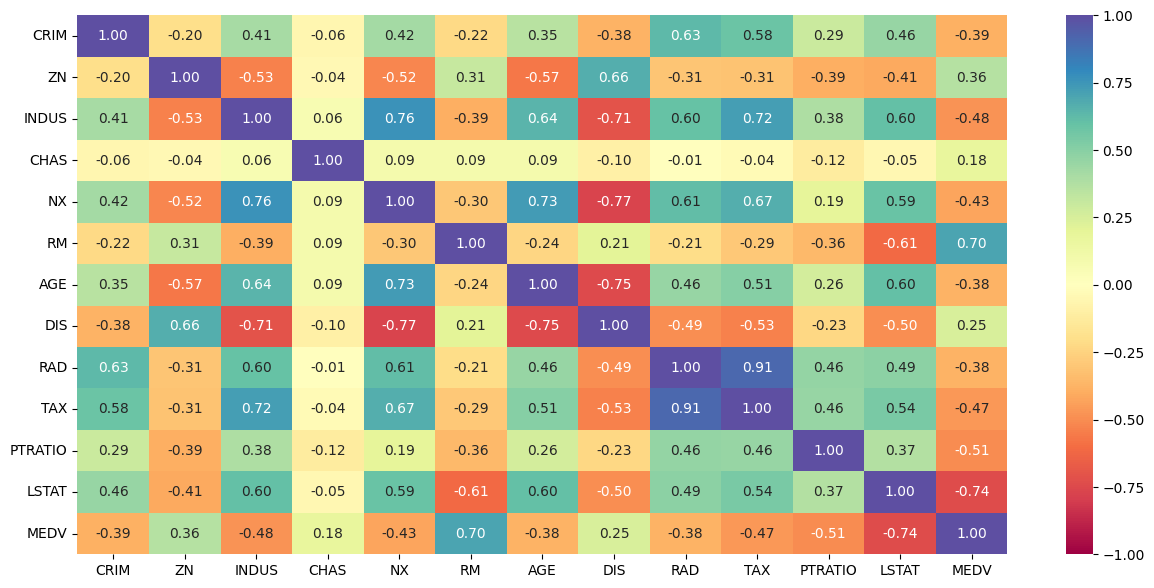

In [9]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [10]:
x=df.drop(['MEDV'],axis=1)
x['CHAS']=x['CHAS'].replace({0:'no',1:'yes'})
x=pd.get_dummies(x,columns=['CHAS'],dtype=int,drop_first=True)
y=df['MEDV']
print(x.head())
print(y.head())

      CRIM    ZN  INDUS     NX     RM  ...  RAD  TAX  PTRATIO  LSTAT  CHAS_yes
0  0.00632  18.0   2.31  0.538  6.575  ...    1  296     15.3   4.98         0
1  0.02731   0.0   7.07  0.469  6.421  ...    2  242     17.8   9.14         0
2  0.02729   0.0   7.07  0.469  7.185  ...    2  242     17.8   4.03         0
3  0.03237   0.0   2.18  0.458  6.998  ...    3  222     18.7   2.94         0
4  0.06905   0.0   2.18  0.458  7.147  ...    3  222     18.7   5.33         0

[5 rows x 12 columns]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [12]:
rm=LinearRegression()
rm.fit(x_train,y_train)

LinearRegression()

**Get the value of the coefficient of determination.**

In [13]:
for idx, column_name in enumerate(x_train.columns):
  print(idx,column_name,rm.coef_[idx])

0 CRIM -0.11384484836913393
1 ZN 0.0611702680406022
2 INDUS 0.054103464958752435
3 NX -22.24850234508457
4 RM 2.698412820009912
5 AGE 0.004836047284745125
6 DIS -1.534295381999261
7 RAD 0.29883325485900736
8 TAX -0.011413580552024391
9 PTRATIO -0.9889146257039357
10 LSTAT -0.5861328508499284
11 CHAS_yes 2.517511959122696


In [16]:
constant=rm.intercept_
constant

49.88523466381781

In [20]:
rm.score(x_test,y_test)

0.7721684899134126

**Get the predictions on test set**

In [14]:
y_predicted=rm.predict(x_test)
print(y_predicted)

[32.40150117 27.88734123 17.73761665 21.6864389  18.64277198 19.94094729
 32.7085502  17.94538314 24.60611975 26.82524253 26.90096156 28.61148515
 21.06927001 27.14884823 23.28950602 20.97128711 16.49752903 37.41740915
 30.73158175  7.85931759 20.79526556 17.26248968 24.9815764  24.78646599
 31.7074955  12.69216907 14.32403958 16.5682859  35.67893111 14.10744455
 21.17675309 13.81313789 42.97589655 17.19173602 21.79086603 20.28245771
 17.2496965  26.79786317  9.60053257 19.50341658 24.26267667 21.01292889
 29.32415843 16.32622975 18.89259627 15.84253098 39.4219366  17.54581892
 27.16819824 22.49672029 24.71069295 24.44733159 24.95966205 27.36771602
  5.04032122 23.98661975 10.21072312 26.97621704 16.61797475 35.25848182
 19.34962957 27.44006658 15.97153242 20.55615142 11.01236112 32.06819363
 36.06893639 21.46948884 24.86137805 25.28821176 23.37503617  6.31759127
 17.00351385 20.0716199  20.63744793 21.64956442 34.0170772  27.99148019
 24.7706903  34.79045218 18.42185314 23.89345326 34

In [18]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              553.7
Date:                Sat, 27 May 2023   Prob (F-statistic):                   9.33e-216
Time:                        09:34:16   Log-Likelihood:                         -1094.7
No. Observations:                 354   AIC:                                      2213.
Df Residuals:                     342   BIC:                                      2260.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Calculate MSE for training set**

**Calculate MSE for test set**

**Get the RMSE on training set**

**Get the RMSE on test set**

**Automate the equation of fit**